# Monkey portfolios

In [34]:
import pandas as pd
import numpy as np

from cvx.simulator.portfolio import build_portfolio

pd.options.plotting.backend = "plotly"

In [35]:
prices=pd.read_csv("data/stock_prices.csv", header=0, index_col=0, parse_dates=True)
portfolio = build_portfolio(prices=prices, initial_cash=1e6)

In [36]:
for _, now, state in portfolio:
    n = len(portfolio.assets)
    w = np.random.rand(n)
    portfolio[now] = state.nav * pd.Series(index=portfolio.assets, data=w/np.sum(w)) / state.prices

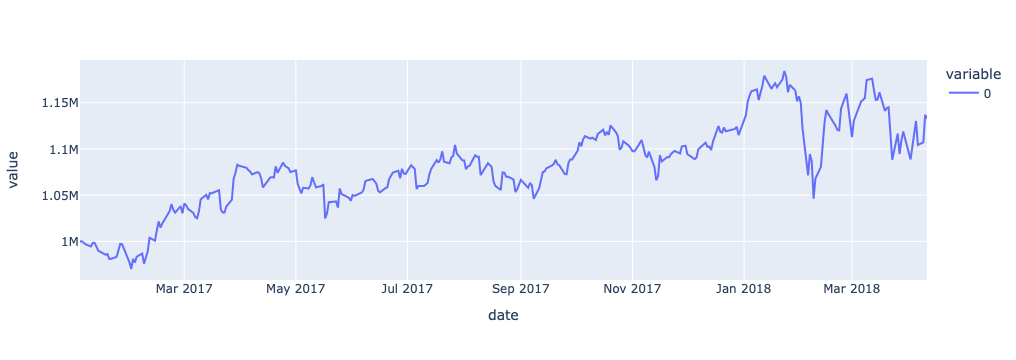

In [37]:
portfolio.nav.plot()